In [1]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import matplotlib.ticker
import matplotlib.lines as lines

plt.style.use(
    [
        "science",
        "ieee",
        "grid",
        #                'notebook',
    ]
)

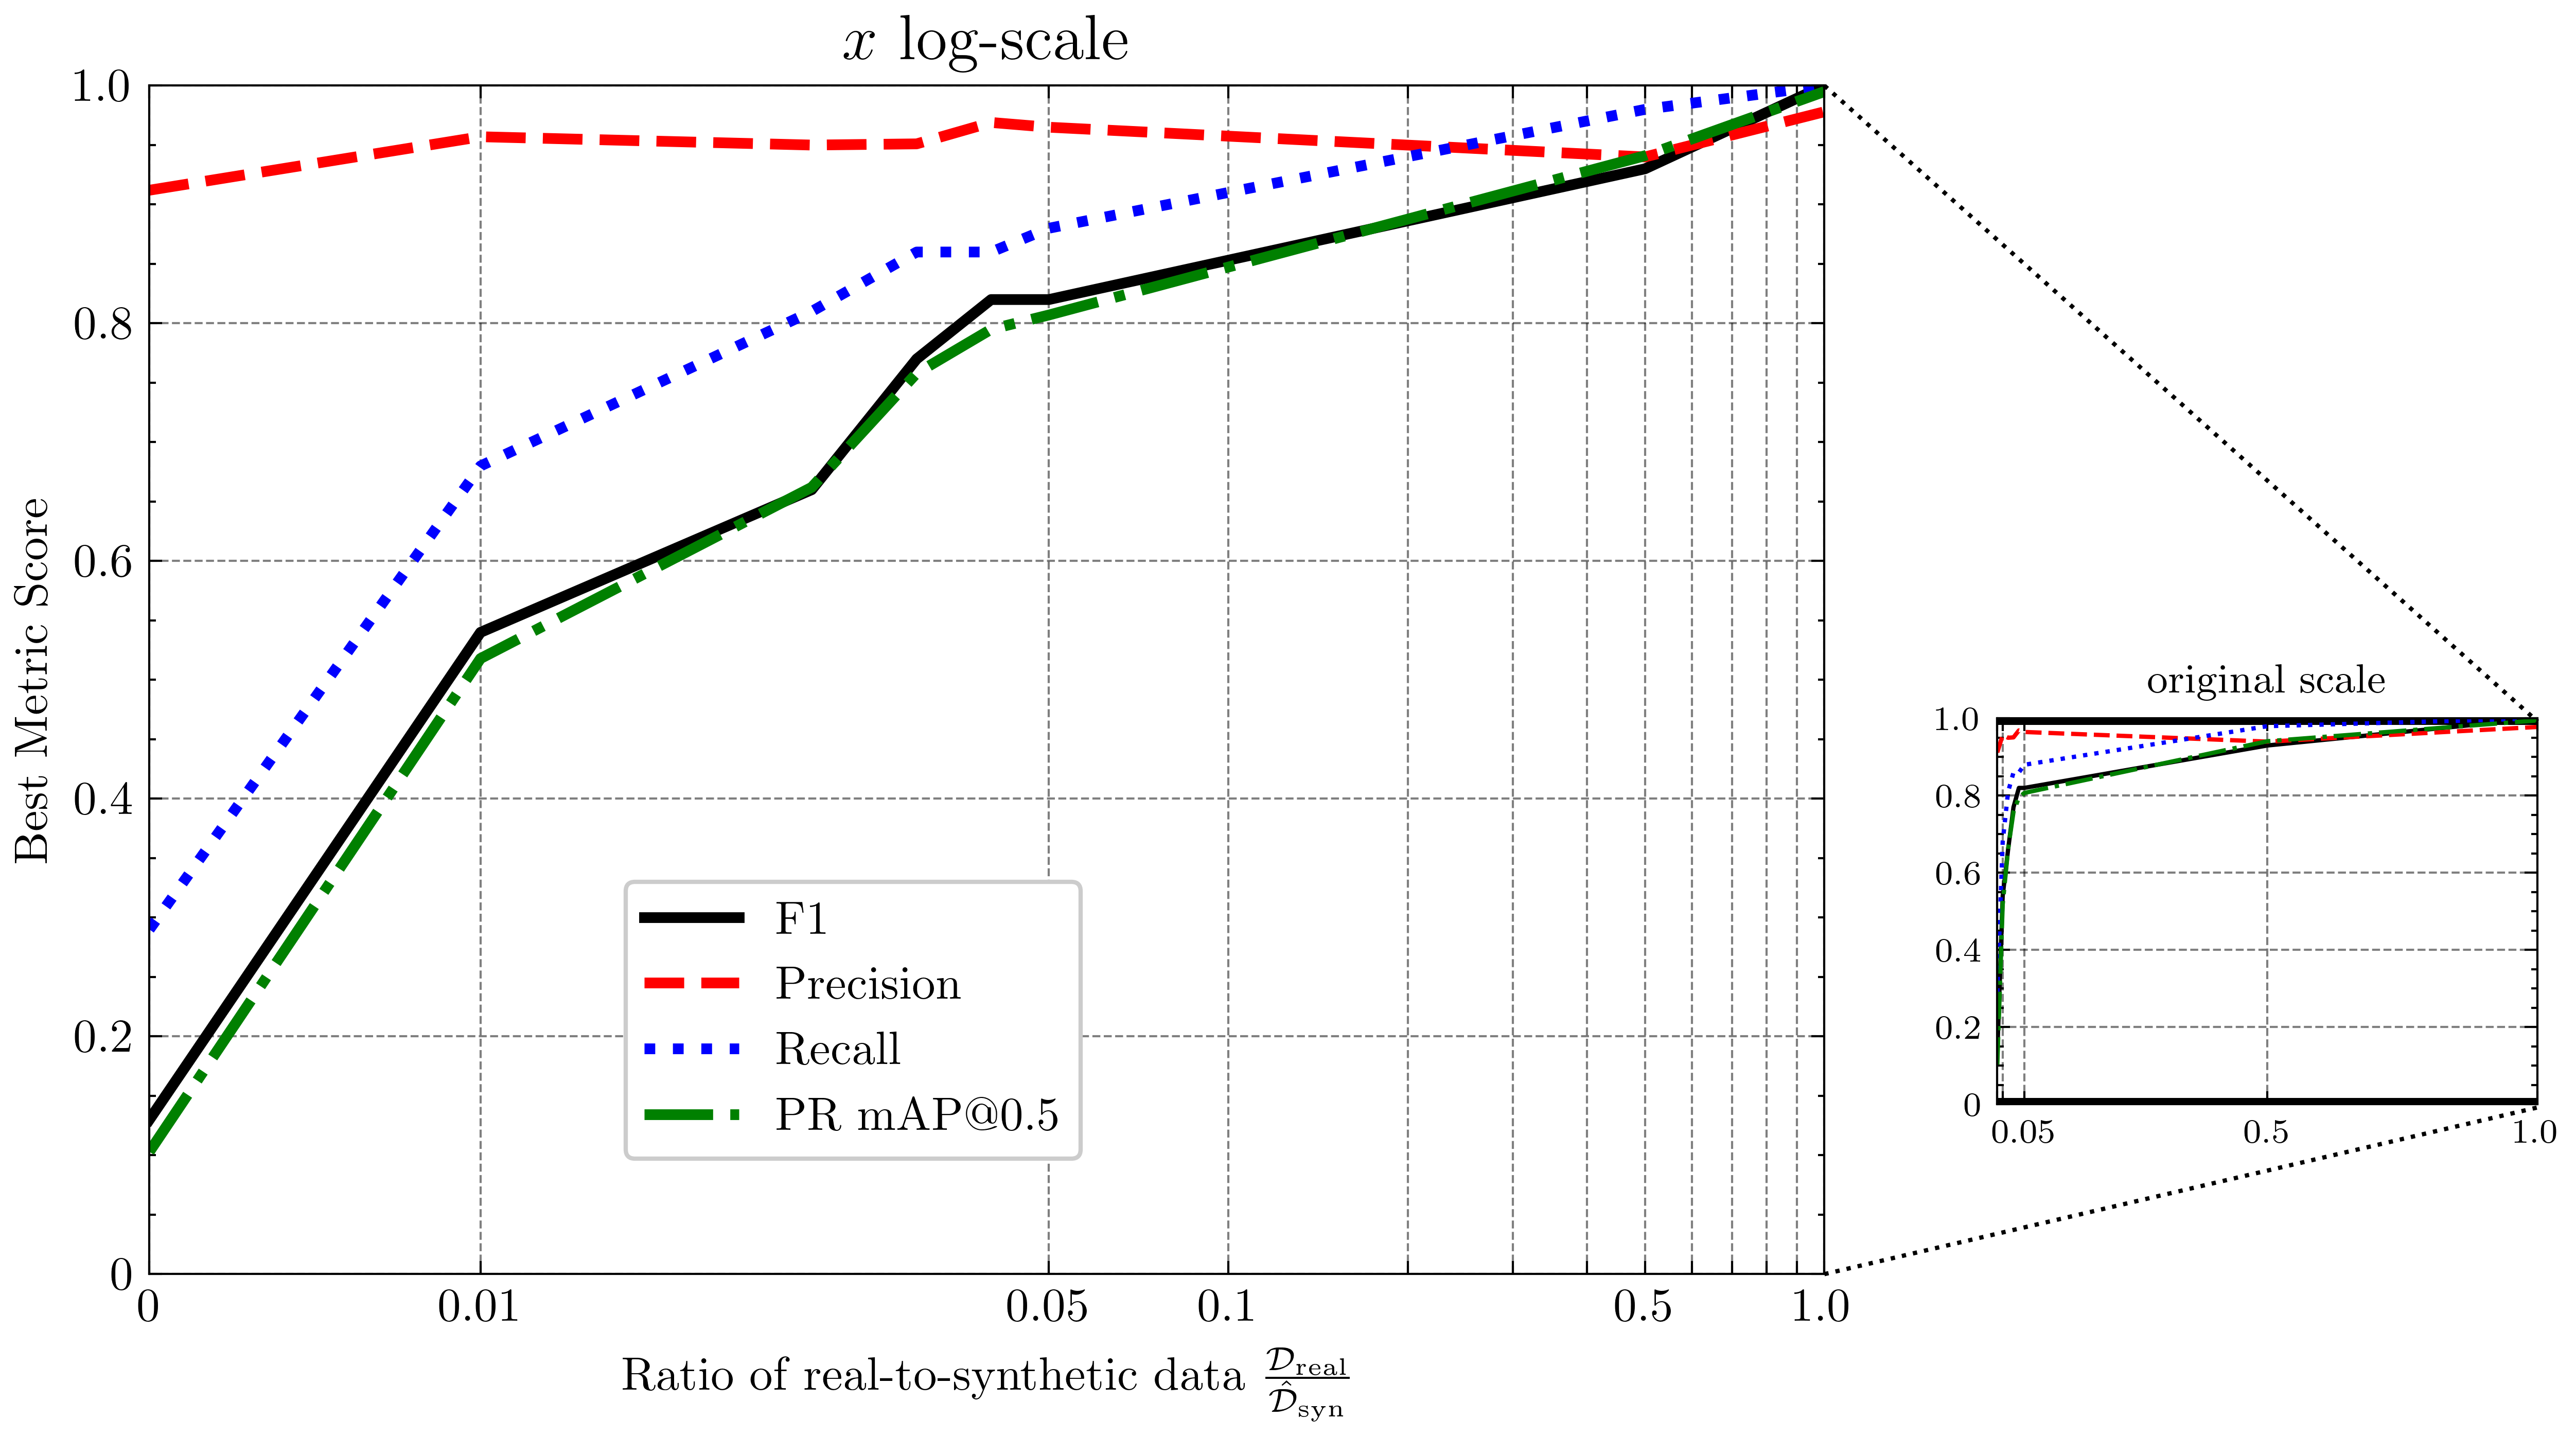

In [5]:
#################################################################
# data
x = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.5, 1]
f1 = [0.130, 0.540, 0.660, 0.770, 0.820, 0.820, 0.930, 1]
p = [0.912, 0.957, 0.950, 0.951, 0.969, 0.965, 0.940, 0.978]
pr = [0.103, 0.518, 0.662, 0.758, 0.795, 0.807, 0.941, 0.995]
r = [0.290, 0.680, 0.810, 0.860, 0.860, 0.880, 0.980, 1]
# label
content = [(f1, "F1"), (p, "Precision"), (r, "Recall"), (pr, "PR mAP@0.5")]
#################################################################

plt.figure(figsize=(7, 5))


def _plot(thing, linewidth=2.5):
    # this function is used to plot both the main and the small plot
    for data, label in content:
        thing.plot(np.array(x) * 100, data, label=label, linewidth=linewidth)


main_fs = 11
sub_fs = 8

_plot(plt)
ax = plt.gca()
fig = plt.gcf()

plt.xlim(0, 100)
plt.ylim(0, 1)
plt.xlabel(
    r"Ratio of "
    r"real-to-synthetic data "
    r"$\frac{\mathcal{D}_\text{real}}"
    r"{\mathcal{\hat{D}}_\text{syn}}$",
    fontsize=main_fs,
)
plt.ylabel("Best Metric Score", fontsize=main_fs)
plt.legend(
    bbox_to_anchor=(0.42, 0.0, 0.15, 0.35),
    fontsize=main_fs,
)

# plt.xticks(np.array(x) * 100)
ax.set_xscale("symlog")
x_tick_at = (
    np.array([0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]) * 100
)
y_tick_at = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

# for x-ticks, we hide some of the label for readibility
ax.set_xticks(
    x_tick_at,
    labels=[0, 0.01, 0.05, 0.1, "", "", "", 0.5, "", "", "", "", "1.0"],
    fontsize=main_fs,
)
ax.set_yticks(y_tick_at, labels=y_tick_at, fontsize=main_fs)


#######################################
# dotted line for the zooming effect
fig.add_artist(lines.Line2D([0.9, 1.23], [0.11, 0.218], color="black", ls="dotted"))
fig.add_artist(lines.Line2D([0.9, 1.23], [0.88, 0.468], color="black", ls="dotted"))
#######################################
ax.set_title("$x$ log-scale", fontsize=main_fs + 4)

##############################################################################
# location for the zoomed portion
sub_axes = plt.axes([0.98, 0.22, 0.25, 0.25])
# plot the zoomed portion
# sub_axes.plot(X_detail, Y_detail, c = 'k')
_plot(sub_axes, 1)
sub_axes.set_xlim(0, 100)
sub_axes.set_ylim(0, 1)
sub_axes.set_xticks(
    [0, 1, 5, 50, 100], labels=["", "", "0.05", "0.5", "1.0"], fontsize=sub_fs
)
sub_axes.set_yticks(
    [0, 0.2, 0.4, 0.6, 0.8, 1],
    labels=["0", "0.2", "0.4", "0.6", "0.8", "1.0"],
    fontsize=sub_fs,
)
sub_axes.set_title("original scale")
##############################################################################

plt.show()

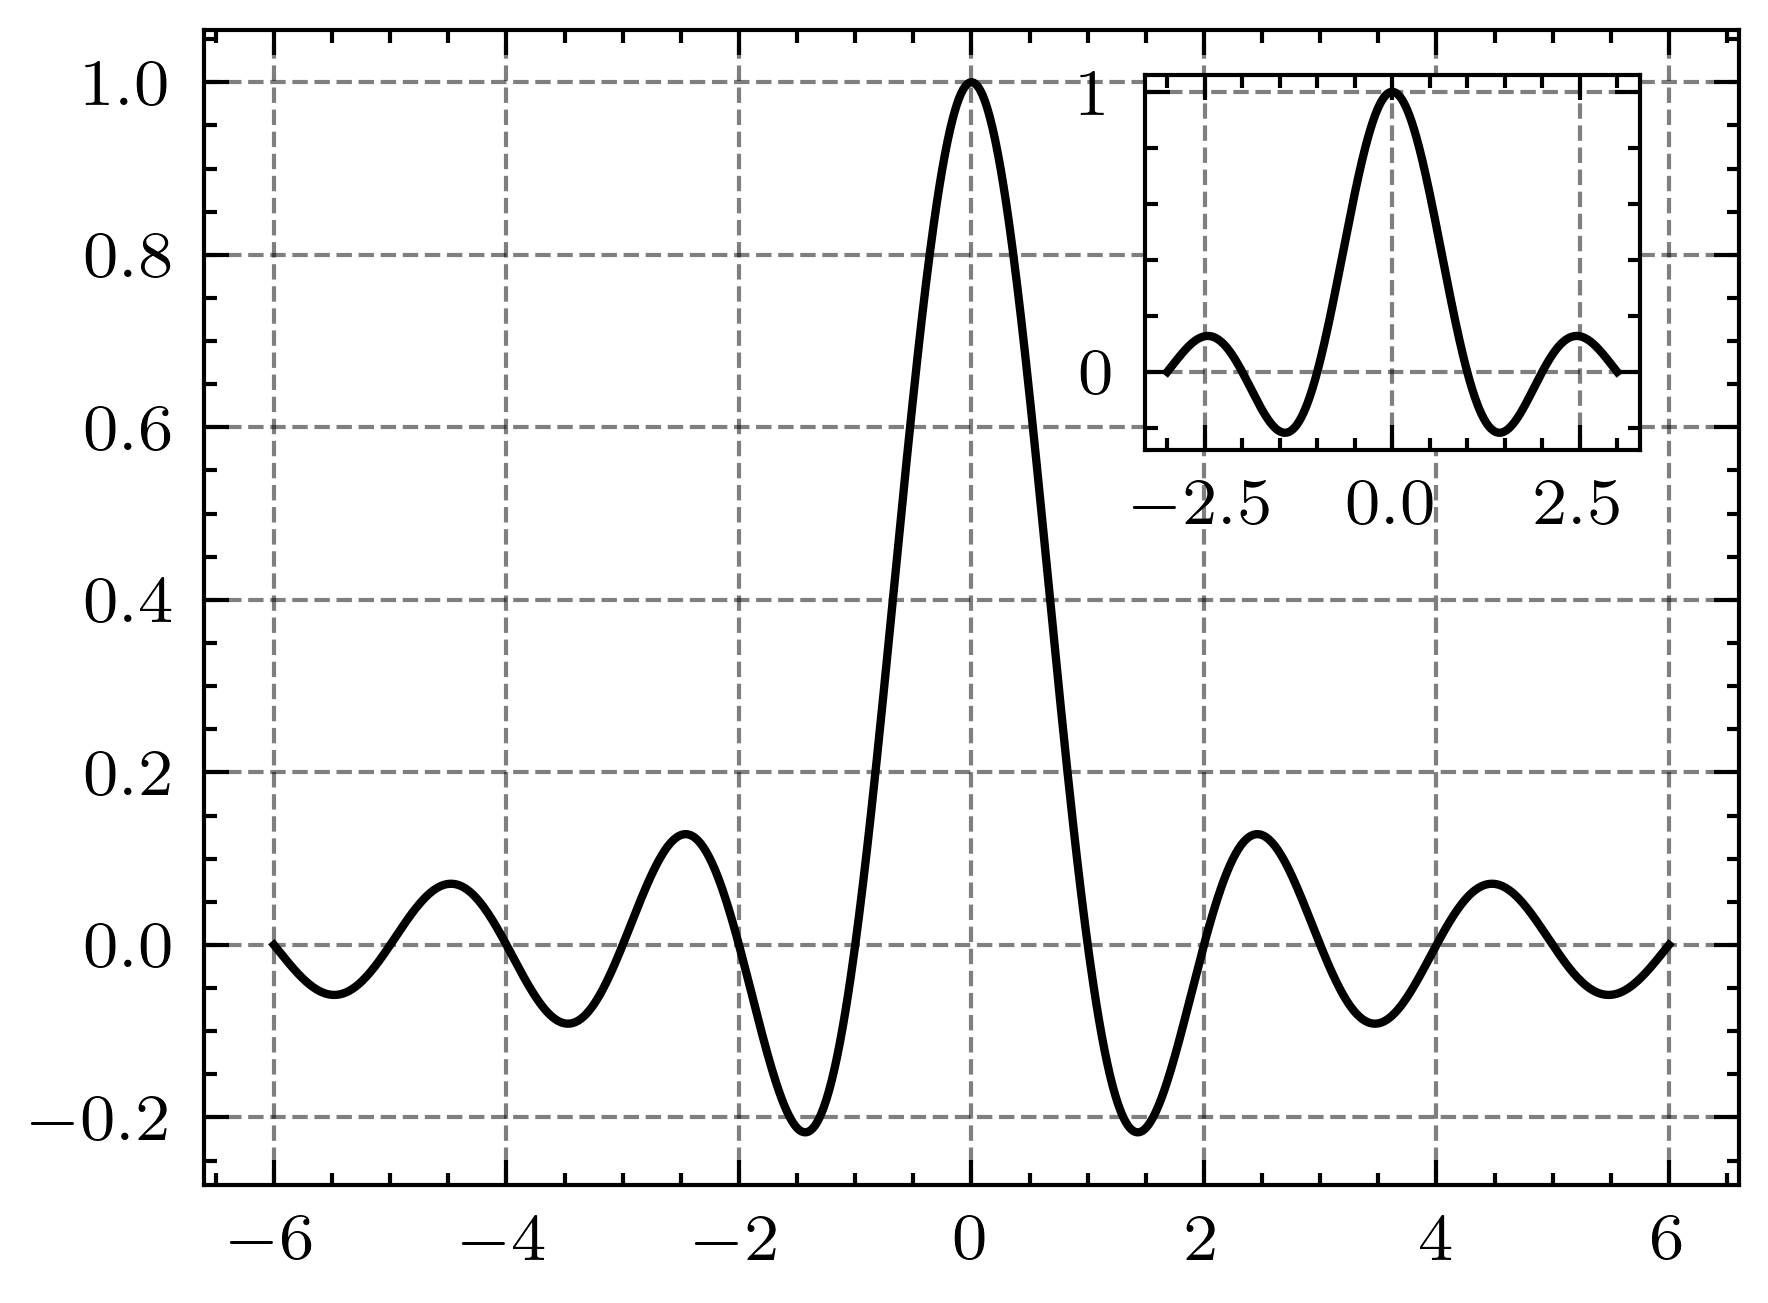

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Generate the main data
X = np.linspace(-6, 6, 1024)
Y = np.sinc(X)

# Generate data for the zoomed portion
X_detail = np.linspace(-3, 3, 1024)
Y_detail = np.sinc(X_detail)

# plot the main figure
plt.plot(X, Y, c="k")

# location for the zoomed portion
sub_axes = plt.axes([0.6, 0.6, 0.25, 0.25])

# plot the zoomed portion
sub_axes.plot(X_detail, Y_detail, c="k")

# insert the zoomed figure
# plt.setp(sub_axes)

plt.show()